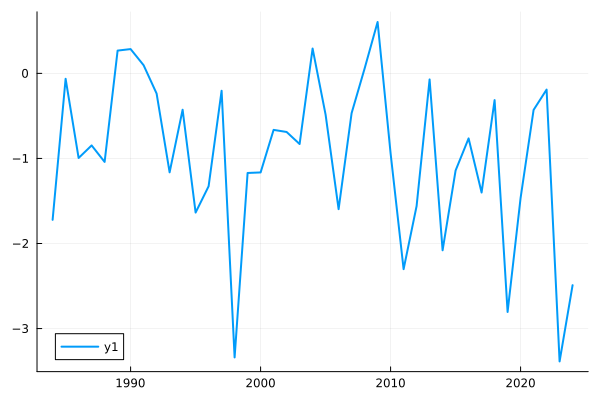

In [510]:
site = 6
dat = CSV.read("../processed_data/average.csv",DataFrame)[:,:2:end]
Plots.plot(dat.year, dat.x,width=2)

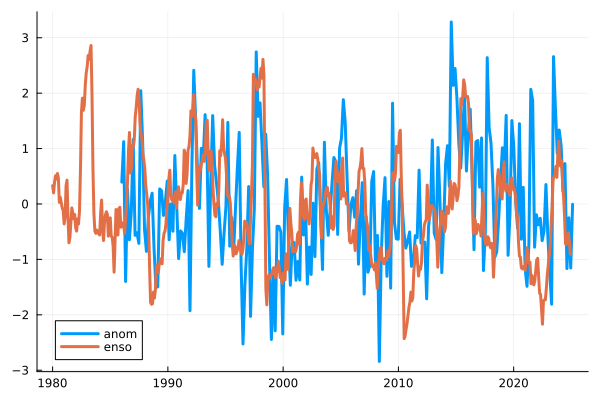

In [543]:
X = CSV.read("../processed_data/covars.csv",DataFrame)[:,2:end]
Plots.plot(X.year,X.value,group=X.variable,width = 3)

In [562]:
include("../src/UDE_one_site.jl")
model, nn = init_model(dat,X,[1,2,3],[];hidden = 10)
nothing

0


In [563]:
UniversalDiffEq.train!(model, loss_function = "conditional likelihood", 
         optim_options = (maxiter = 250, step_size = 0.05), verbose = true,
         regularization_weight = 1e1, 
         loss_options = (observation_error = 0.025, process_error = 0.075))

3099.439 2921.382 2729.01 2583.658 2450.135 2313.673 2179.635 2052.606 1934.451 1825.558 1725.067 1631.172 1542.115 1457.215 1376.953 1302.141 1233.172 1169.715 1110.943 1055.982 1004.211 955.426 909.792 867.566 828.852 793.292 760.238 729.089 699.663 672.124 646.647 623.189 601.433 581.044 561.772 543.597 526.595 510.824 496.18 482.545 469.74 457.716 446.517 436.104 426.396 417.302 408.777 400.827 393.422 386.553 380.129 374.099 368.432 363.146 358.237 353.659 349.382 345.323 341.454 337.817 334.362 331.075 327.93 324.835 321.856 318.941 316.114 313.362 310.632 307.967 305.342 302.772 300.236 297.708 295.213 292.751 290.28 287.834 285.382 282.906 280.431 277.915 275.328 272.7 270.002 267.253 264.439 261.602 258.743 255.895 253.072 250.308 247.608 245.013 242.514 240.154 237.911 235.793 233.797 231.87 230.017 228.176 226.359 224.579 222.801 221.074 219.384 217.718 216.101 214.495 212.924 211.342 209.77 208.199 206.632 205.043 203.464 201.859 200.243 198.62 196.983 195.352 193.733 192.1

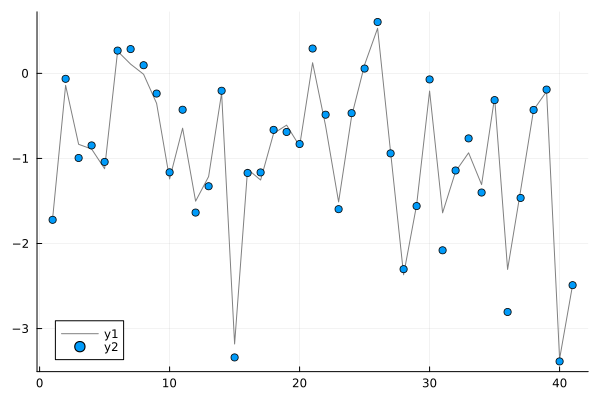

In [564]:
site = 1
Plots.plot(model.parameters.uhat[site,:], color = "grey")
Plots.scatter!(model.data[site,:], c = 1)

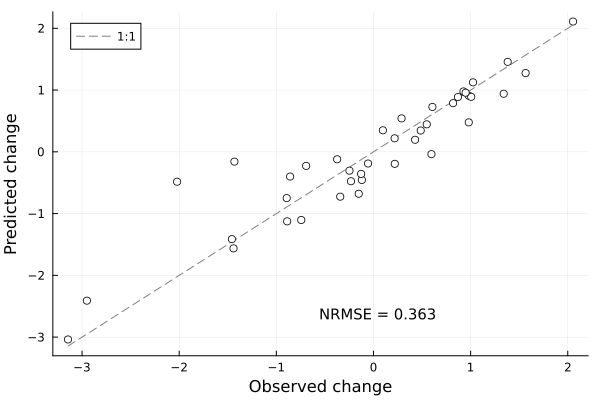

In [565]:
UniversalDiffEq.plot_predictions(model)

In [ ]:
model.parameters.process_model.β

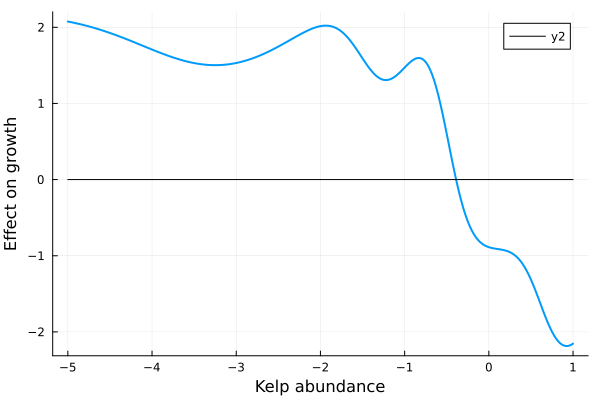

In [574]:
NNpars = model.parameters.process_model.NN
xvals = -5.0:0.025:1.0
zvals1 = zeros(length(xvals))
site = 4

i = 0
for x in xvals
    i += 1
    zvals1[i] =   nn([x,1,0],NNpars)[1] + model.parameters.process_model.FE
end

Plots.plot(xvals,zvals1, width = 2, xlabel = "Kelp abundance", ylabel = "Effect on growth", label = "")

Plots.plot!([-5,1.0],[0.0,0.0],color = "black")



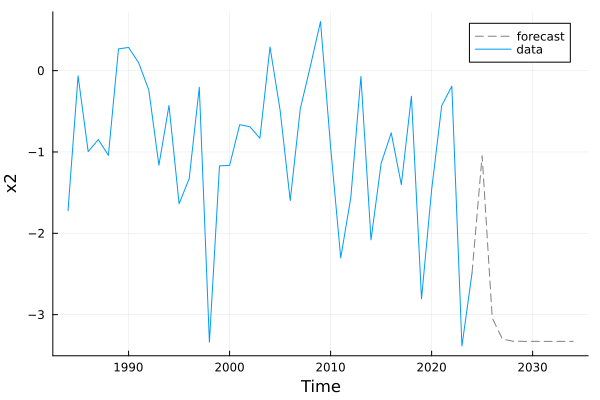

In [570]:
import Pkg 
plt,plts=plot_forecast(model,10)
plt